[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1jU8WeuH8RXkzme1ywD2UcunejSwFcwSs?authuser=3)


Saving mall_customers.csv to mall_customers.csv
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1  Female   39                34.7                    51.1
1           2  Female   28               124.4                    51.9
2           3  Female   44                63.5                    47.3
3           4    Male   22                96.4                    56.8
4           5    Male   39                62.4                    43.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              200 non-null    int64  
 1   Gender                  200 non-null    object 
 2   Age                     200 non-null    int64  
 3   Annual Income (k$)      200 non-null    float64
 4   Spending Score (1-100)  200 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usag

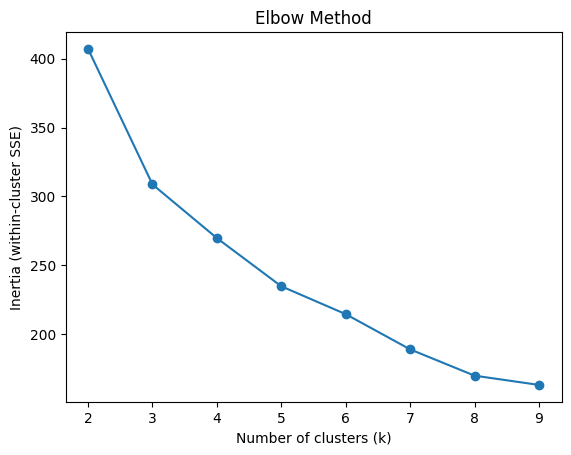

Silhouette score (k=4): 0.253


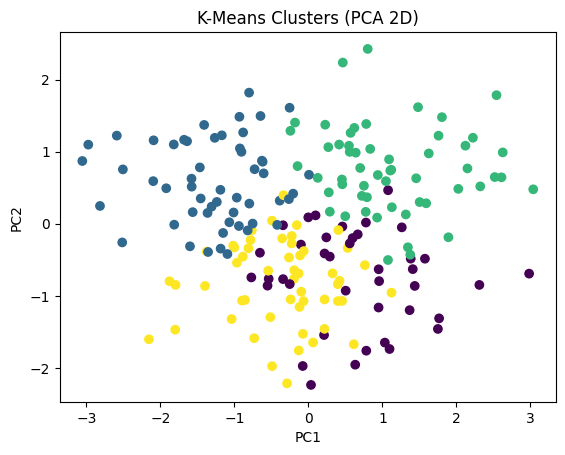

Cluster centers (original units):
    Age  Annual Income (k$)  Spending Score (1-100)
0  26.3                56.1                    72.1
1  40.2                54.4                    53.5
2  31.8                98.8                    68.3
3  27.0                58.5                    52.8

Cluster summary (means):
          Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                  
0        26.3                56.1                    72.1
1        40.2                54.4                    53.5
2        31.8                98.8                    68.3
3        27.0                58.5                    52.8

DBSCAN labels (-1 means noise): [-1  0]


In [ ]:
!pip install pandas matplotlib scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import pandas as pd

url = "https://raw.githubusercontent.com/zoyarattani/Elevvo-Pathways-Machine-Learning-Internship-Tasks/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)

print(df.head())

X = df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertias = []
K_range = range(2, 10)
for k in K_range:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(list(K_range), inertias, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow Method")
plt.show()

k = 4
kmeans = KMeans(n_clusters=k, n_init="auto", random_state=42)
labels = kmeans.fit_predict(X_scaled)
df["Cluster"] = labels

sil = silhouette_score(X_scaled, labels)
print(f"Silhouette score (k={k}): {sil:.3f}")

pca = PCA(n_components=2, random_state=42)
coords_2d = pca.fit_transform(X_scaled)
plt.scatter(coords_2d[:,0], coords_2d[:,1], c=labels)
plt.title("K-Means Clusters (PCA 2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()

centroids_original_units = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids_original_units, columns=["Age", "Annual Income (k$)", "Spending Score (1-100)"])
print("Cluster centers (original units):")
print(centroids_df.round(1))

summary = df.groupby("Cluster")[["Age","Annual Income (k$)","Spending Score (1-100)"]].mean().round(1)
print("\nCluster summary (means):")
print(summary)

db = DBSCAN(eps=0.9, min_samples=6).fit(X_scaled)
db_labels = db.labels_
print("\nDBSCAN labels (-1 means noise):", np.unique(db_labels))
